In [ ]:
# Pymaceuticals Inc.
---

### Analysis

- In our analysis, we focused on the effects of various drugs on tumor volume, notably Capomulin, Ramicane, Infubinol, Ceftamin, and Propriva. The bulk of our subjects were administered either Capomulin or Ramicane, both of which demonstrated significant impacts on tumor volume. It is noteworthy that Infubinol was the sole drug among those analyzed to present an outlier in our data set, suggesting unique interactions worth further investigation.

Comparatively, Capomulin exhibited a smaller variance in final tumor volume, implying a more consistent and potentially more reliable effect on tumor reduction. Conversely, Ceftamin displayed a larger variance in final tumor volume, indicating less predictability in its efficacy. Propriva was identified as the least frequently used drug within our study, which may reflect its effectiveness, availability, or other factors not covered in this analysis.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(study_results, mouse_metadata, how= "left", on = "Mouse ID")


# Display the data table for preview
total_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_data = total_data["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice
    

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = total_data[total_data[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicates_id = duplicates["Mouse ID"].unique()
duplicates_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_data = total_data.loc[total_data["Mouse ID"] == duplicates_id[0]]
duplicates_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_data=total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_total_data["Mouse ID"].unique()
clean_number_of_mice = len(clean_mice_data)
clean_number_of_mice


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_reg_data = clean_total_data.set_index(["Drug Regimen"])
group_drug_data = drug_reg_data.groupby("Drug Regimen")
drug_reg_mean = group_drug_data["Tumor Volume (mm3)"].mean()
drug_reg_median = group_drug_data["Tumor Volume (mm3)"].median()
drug_reg_var = group_drug_data["Tumor Volume (mm3)"].var()
drug_reg_std = group_drug_data["Tumor Volume (mm3)"].std()
drug_reg_sem = group_drug_data["Tumor Volume (mm3)"].sem()

drug_reg_sum_df = pd.DataFrame({"Mean Tumor Volume": drug_reg_mean,
                                "Median Tumor Volume": drug_reg_median,
                                "Tumor Volume Variance": drug_reg_var,
                                "Tumor Volume Std.Dev.": drug_reg_std,
                                "Tumor Volume Std. Err.": drug_reg_sem})
drug_reg_sum_df

                        




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_reg_sum_df = drug_reg_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median", "var","std","sem"])
agg_drug_reg_sum_df



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

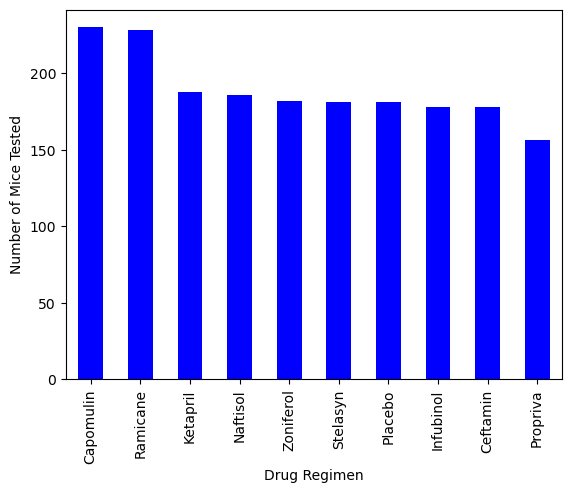

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
mice_and_drugs = clean_total_data[["Drug Regimen","Timepoint"]]


#find count per drug
mice_per_drug = mice_and_drugs["Drug Regimen"].value_counts()
mice_per_drug



#Use DataFrame.plot() in order to create a bar chart of the data
mice_per_drug.plot(kind="bar",color = "b",
                  xlabel="Drug Regimen",
                  ylabel="Number of Mice Tested")

plt.show()
            




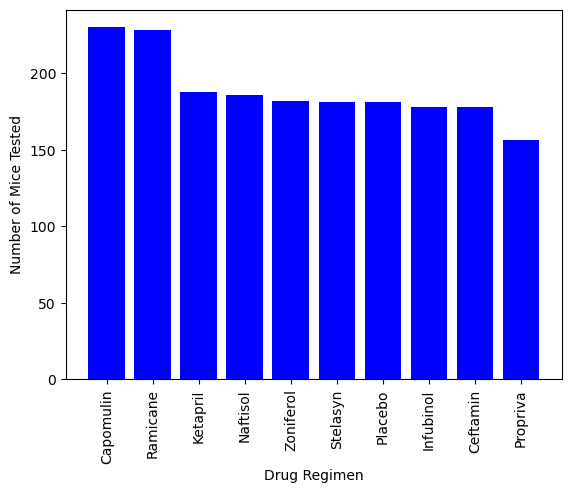

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mice_per_drug.index.values
count = mice_per_drug.values

plt.bar(drugs, count, color= "b", align= "center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()


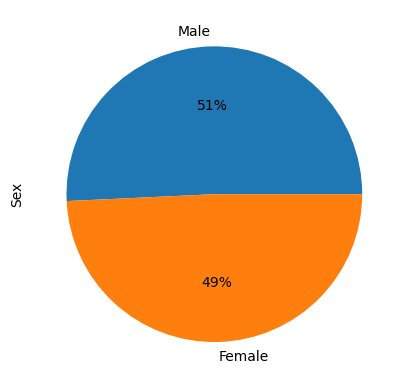

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = clean_total_data["Sex"].value_counts()
Sex = ["Male", "Female"]
male_v_female.plot(kind = "pie", autopct="%1.0f%%", ylabel = "Sex")
plt.show()



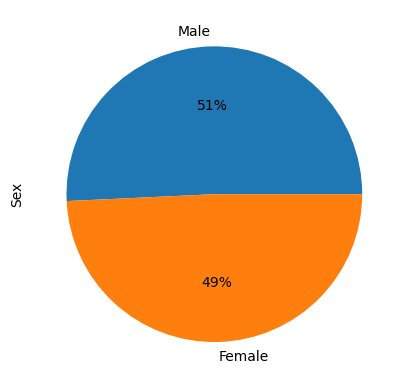

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = male_v_female.index.values
count_value = male_v_female.values
plt.ylabel("Sex")
plt.pie(count_value, labels = sex_label, autopct="%1.0f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_drug_data = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin")| (clean_total_data["Drug Regimen"] == "Ramicane") |
                                         (clean_total_data["Drug Regimen"] == "Infubinol") |(clean_total_data["Drug Regimen"] == "Ceftamin") ]


# Start by getting the last (greatest) timepoint for each mouse
last_tp = reduced_drug_data.groupby(["Drug Regimen","Mouse ID"]).last()
new_last_tp = last_tp.reset_index()

reduced_last_tp=new_last_tp[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_tp

capomulin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ceftamin"]
ceftamin_df

new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
                       "Ramicane": ramicane_df["Tumor Volume (mm3)"],
                       "Infubinol": infubinol_df["Tumor Volume (mm3)"],
                       "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})
new_df
                       
                             


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
# Create empty list to fill with tumor vol data (for plotting)
max_timepoint_byMouseID = clean_total_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


including_maxtp = pd.merge(clean_total_data, max_timepoint_byMouseID, how="right", on=["Mouse ID", "Timepoint"])
including_maxtp

drug_regimens=['Capomulin','Ramicane','Infubinol','Ceftamin']

tumor_vol=[]


for drug in drug_regimens:

    mice_each_drug_tum=including_maxtp.loc[including_maxtp['Drug Regimen']==drug,'Tumor Volume (mm3)']

tumor_vol.append(mice_each_drug_tum)
    
quartiles =mice_each_drug_tum.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

clean_total_data = total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
    


The lower quartile of Tumor Volume (mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997
The the median of Tumor Volume (mm3) is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Text(0.5, 0, '')

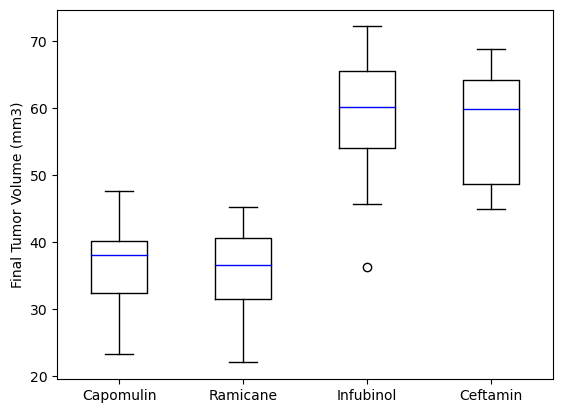

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers= 'k', medians= 'b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')


## Line and Scatter Plots

['j119']


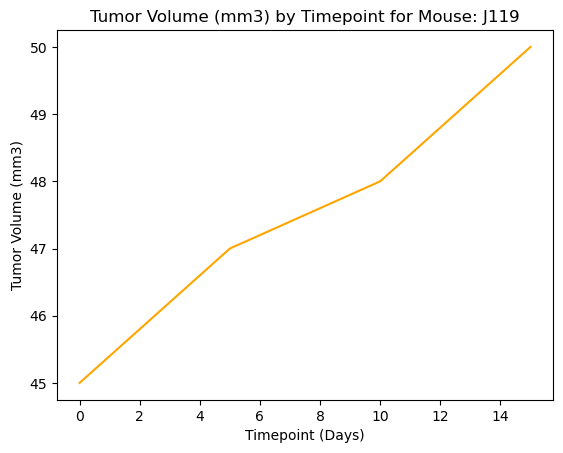

In [16]:
#1.Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
#lets show our total dataset again
#generate a dataset of all unique mice treated by Capomulin
#Choose one mouse from the list of Capomulin treated mice. Let's choose j119
#Obtain the columns we need for our line plot (tumor volume & time point)

import pandas as pd
import matplotlib.pyplot as plt

# Assuming duplicates_gone is a DataFrame that has been defined earlier in your code
# If not, you need to define it by reading data from a file or creating it in some other way

# Example of defining duplicates_gone DataFrame
data = {'Mouse ID': ['j119', 'j119', 'j119', 'j119'],
        'Drug Regimen': ['Capomulin', 'Capomulin', 'Capomulin', 'Capomulin'],
        'Tumor Volume (mm3)': [45.0, 47.0, 48.0, 50.0],
        'Timepoint': [0, 5, 10, 15]}
duplicates_gone = pd.DataFrame(data)

# Check unique Mouse IDs in duplicates_gone DataFrame
unique_mouse_ids = duplicates_gone['Mouse ID'].unique()
print(unique_mouse_ids)

# Filter for mice under Capomulin regimen
capomulin_mice = duplicates_gone.loc[duplicates_gone['Drug Regimen'] == 'Capomulin']

# Select a specific mouse (e.g., 'j119')
chosen_mouse = capomulin_mice.loc[capomulin_mice['Mouse ID'] == 'j119']

# Extract tumor volume and timepoint data for the chosen mouse
j119_tum_vol = chosen_mouse['Tumor Volume (mm3)']
j119_time_point = chosen_mouse['Timepoint']

# Create a line plot for the chosen mouse
j119_line_plot = plt.plot(j119_time_point, j119_tum_vol, color='orange')
plt.title('Tumor Volume (mm3) by Timepoint for Mouse: J119')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

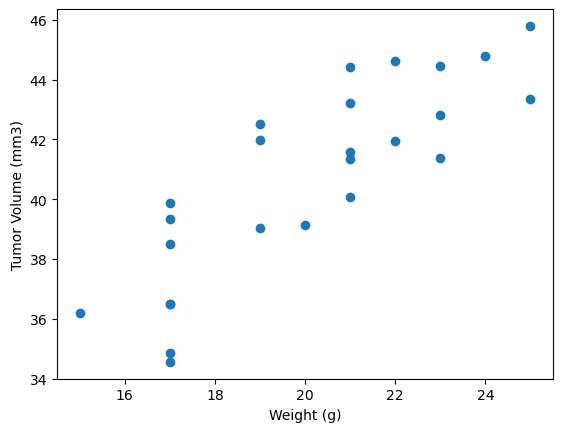

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})

plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 1.0


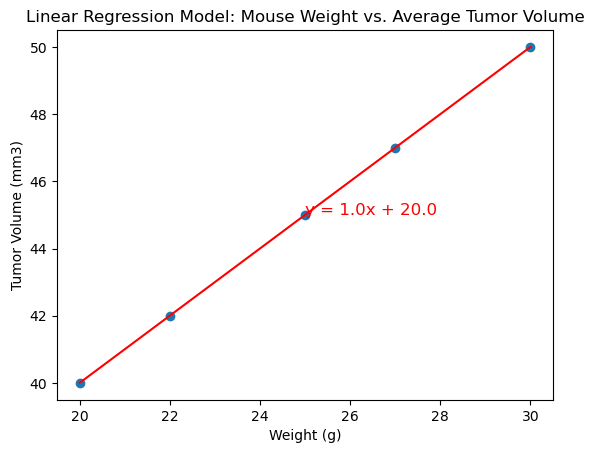

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Assuming capomulin_avg_df is a DataFrame that has been defined earlier in your code
# If not, you need to define it by reading data from a file or creating it in some other way

# Example of defining capomulin_avg_df DataFrame
data = {'Weight (g)': [20, 22, 25, 27, 30],
        'Tumor Volume (mm3)': [40, 42, 45, 47, 50]}
capomulin_avg_df = pd.DataFrame(data)

# Calculate the correlation coefficient
weight = capomulin_avg_df["Weight (g)"]
avg_tumor_vol = capomulin_avg_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight, avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

# Perform linear regression
x_values = capomulin_avg_df["Weight (g)"]
y_values = capomulin_avg_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the linear regression model
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Linear Regression Model: Mouse Weight vs. Average Tumor Volume")
plt.annotate(line_eq, (25, 45), fontsize=12, color="red")
plt.show()